In [1]:
from itertools import groupby
from os.path import exists

import matplotlib.pyplot as plt
import numpy as np
import yaml




In [2]:
with open('../config.yml', 'r') as ymlfile:
    config = yaml.safe_load(ymlfile)
    data = config['data']



In [3]:
for data_name in ['454', 'Illumina']:
    fastq_file = open('../data/' + data_name + '.fastq', 'r')

    count = 0
    # Strips the newline character
    read_lengths = []
    counter = 0
    line = fastq_file.readline()
    while line:
        if counter % 4 == 1:
            read_lengths.append(len(line))
        counter += 1
        line = fastq_file.readline()

    print('from file:', data_name + '.fastq')
    print('number of reads:', len(read_lengths))
    print('mean read length: ', np.mean(read_lengths))
    print('std read length: ', np.std(read_lengths))
    print('max read length: ', max(read_lengths))
    print('min read length: ', min(read_lengths))



from file: 454.fastq
number of reads: 188176
mean read length:  500.09891803418077
std read length:  82.15693521143405
max read length:  1007
min read length:  38
from file: Illumina.fastq
number of reads: 1429988
mean read length:  216.40433695947098
std read length:  56.58643809996435
max read length:  252
min read length:  33


In [4]:
region_matrix = [[790 - 1, 1186],  # 0 : p17
                 [1186 - 1, 1879],  # 1 : p24
                 [1879 - 1, 2292],  # 2 : p2p6
                 [2253 - 1, 2550],  # 3 : PR
                 [2550 - 1, 3870],  # 4 : RT
                 [3870 - 1, 4230],  # 5 : RNase
                 [4230 - 1, 5096],  # 6 : int
                 [5041 - 1, 5620],  # 7 : vif
                 [5559 - 1, 5850],  # 8 : vpr
                 [6062 - 1, 6310],  # 9 : vpu
                 [6225 - 1, 7758],  # 10 : gp120
                 [7758 - 1, 8795],  # 11 : gp41
                 [8797 - 1, 9417]]  # 12 : nef


def check_in_which_genes(start, stop):
    started = False if start > region_matrix[0][0] else True
    region_indexes = []
    for region_index, region in enumerate(region_matrix):
        if started:
            region_indexes.append(region_index)
            if stop <= region[1]:
                if region_index + 1 < 13 and region_matrix[region_index + 1][0] < stop < region_matrix[region_index + 1][1]:
                    region_indexes.append(region_index + 1)
                break
        if not started and region[0] <= start <= region[1]:

            region_indexes.append(region_index)
            started = True
            if stop <= region[1]:
                if region_index + 1 < 13 and region_matrix[region_index + 1][0] < stop < region_matrix[region_index + 1][1]:
                    region_indexes.append(region_index + 1)
                break
    return region_indexes

from file: ./data/created/reads_mapped.sam
number of reads: 173915
mean read length:  515.9305982807693
std read length:  22.91951424388577
max read length:  706
min read length:  301
[12282, 19271, 14715, 12100, 25701, 11858, 28358, 26381, 19080, 13402, 36111, 31055, 30257]
from file: ./data/created/reads_mapped.sam
number of reads: 1157783
mean read length:  236.89768462656647
std read length:  26.626061037662897
max read length:  251
min read length:  151
[84612, 124326, 100183, 108004, 322907, 126646, 168732, 77257, 61834, 70104, 146382, 131404, 51577]


<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

[[12282, 19271, 14715, 12100, 25701, 11858, 28358, 26381, 19080, 13402, 36111, 31055, 30257], [84612, 124326, 100183, 108004, 322907, 126646, 168732, 77257, 61834, 70104, 146382, 131404, 51577]]


<Figure size 864x360 with 0 Axes>

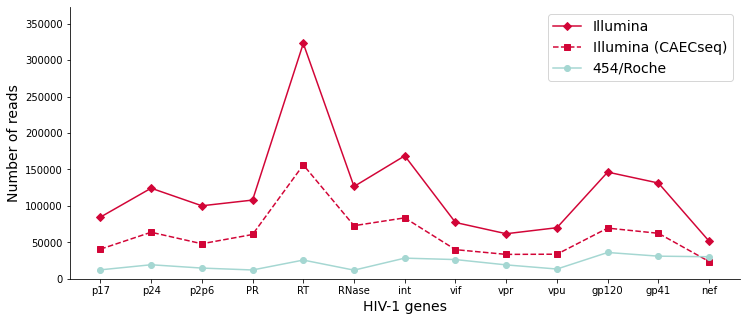

In [5]:
number_of_reads_per_gene_per_NGS = []
gene_names = ['p17', 'p24', 'p2p6', 'PR', 'RT', 'RNase', 'int', 'vif', 'vpr', 'vpu', 'gp120', 'gp41', 'nef']
CAEC_cleaned_data = [40670, 63873, 48089, 60781, 156261, 72858,  83619, 39987, 33494, 33747, 69534, 62428, 23697]
both_reads_per_gene = []
for data_name in ['454', 'Illumina']:
    sam_file = open('../data/'+ data_name+ '_mapped.sam', 'r')
    number_of_reads_per_gene = [0 for _ in range(13)]
    read_lengths = []
    counter = 0
    line = sam_file.readline()
    while line:
        read_lengths.append(len(line.split('\t')[9]))
        position = int(line.split('\t')[3])
        indexes = check_in_which_genes(int(line.split('\t')[3]), int(line.split('\t')[3]) + read_lengths[-1])
        for index in indexes:
            number_of_reads_per_gene[index] += 1
        line = sam_file.readline()

    print('from file:', config[data]['reads_path'] + '_mapped.sam')
    print('number of reads:', len(read_lengths))
    print('mean read length: ', np.mean(read_lengths))
    print('std read length: ', np.std(read_lengths))
    print('max read length: ', max(read_lengths))
    print('min read length: ', min(read_lengths))
    print(number_of_reads_per_gene)

    number_of_reads_per_gene_per_NGS.append(number_of_reads_per_gene)
    plt.figure(figsize=(12,5))
    # plt.scatter(gene_names, number_of_reads_per_gene_per_NGS[0])
    # plt.plot(gene_names,number_of_reads_per_gene_per_NGS[0], '-o', color="#A5D7D2")

    # if data_name == 'Illumina':
    #     plt.plot(gene_names,number_of_reads_per_gene, '-D', color="#D20537", label='Illumina')
    #     plt.plot(gene_names,CAEC_cleaned_data, '--s', color="#D20537", label ='Illumina (CAECseq)')
    #     plt.ylim([0,max(number_of_reads_per_gene)+20000])
    both_reads_per_gene.append(number_of_reads_per_gene)
    # else:
    #     plt.ylim([0,max(number_of_reads_per_gene)+2000])
    # ax.spines["top"].set_visible(False)
    # ax.spines["right"].set_visible(False)
    # ax.spines["left"].set_visible(False)


CAEC_cleaned_data = [40670, 63873, 48089, 60781, 156261, 72858,  83619, 39987, 33494, 33747, 69534, 62428, 23697]
plt.show()
print(number_of_reads_per_gene_per_NGS)
plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(gene_names,both_reads_per_gene[1], '-D', color="#D20537", label ='Illumina')
ax.plot(gene_names,CAEC_cleaned_data, '--s', color="#D20537", label ='Illumina (CAECseq)')
ax.plot(gene_names,both_reads_per_gene[0], '-o', color="#A5D7D2", label="454/Roche")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
# ax.spines["left"].set_visible(False)
#

plt.ylim([0,max(both_reads_per_gene[1])+50000])
plt.rcParams.update({'font.size': 12})
plt.ylabel('Number of reads',fontsize=14)
plt.xlabel('HIV-1 genes',fontsize=14)
plt.show()


percentage_454: [4.3775015949617035, 6.8684931799793985, 5.244661779014938, 4.312633878768654, 9.160248208118444, 4.226381201193281, 10.107245581332354, 9.402611103784782, 6.800417719579001, 4.776687540765082, 12.870539007951642, 11.068499595467813, 10.784079609082905]
percentage_illumina: [5.375712848037571, 7.898889939312616, 6.364995984670591, 6.86189299909528, 20.51547426631291, 8.046288107509174, 10.720167119026563, 4.90842253463857, 3.9285423845974, 4.453966027263578, 9.300189076270927, 8.348581419698494, 3.2768772935663244]


<Figure size 864x360 with 0 Axes>

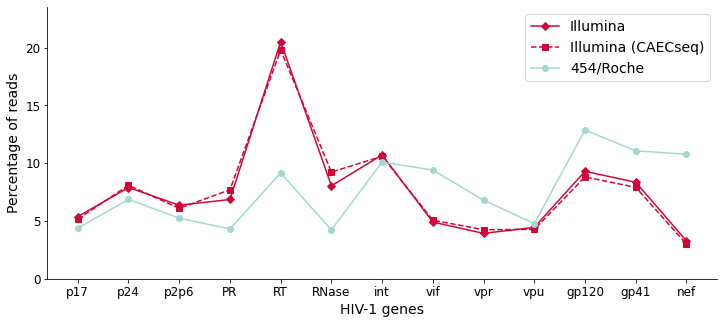

In [6]:
gene_names = ['p17', 'p24', 'p2p6', 'PR', 'RT', 'RNase', 'int', 'vif', 'vpr', 'vpu', 'gp120', 'gp41', 'nef']
# plt.scatter(gene_names, number_of_reads_per_gene_per_NGS[0])
percentage_454 = list(map(lambda x: x/sum(number_of_reads_per_gene_per_NGS[0]) * 100, number_of_reads_per_gene_per_NGS[0]))
percentage_illumina = list(map(lambda x: x/sum(number_of_reads_per_gene_per_NGS[1]) * 100, number_of_reads_per_gene_per_NGS[1]))
print('percentage_454:', percentage_454)

print('percentage_illumina:', percentage_illumina)

CAEC_cleaned_data = [40670, 63873, 48089, 60781, 156261, 72858,  83619, 39987, 33494, 33747, 69534, 62428, 23697]
percentage_illumina_caecseq = list(map(lambda x: x/sum(CAEC_cleaned_data) * 100, CAEC_cleaned_data))

plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(gene_names,percentage_illumina, '-D', color="#D20537", label ='Illumina')
ax.plot(gene_names,percentage_illumina_caecseq, '--s', color="#D20537", label ='Illumina (CAECseq)')
ax.plot(gene_names,percentage_454, '-o', color="#A5D7D2", label ='454/Roche')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
# ax.spines["left"].set_visible(False)
#

plt.ylim([0,max([*percentage_illumina, *percentage_454])+3])
plt.rcParams.update({'font.size': 12})
plt.ylabel('Percentage of reads',fontsize=14)
plt.xlabel('HIV-1 genes',fontsize=14)
plt.show()


454
loaded
9721
Illumina
loaded
9721
[[78.18125707231766, 76.1444295854336, 74.46764736138257, 72.44110688200803, 70.26026128999075, 67.83252751774509, 65.45622878304701, 62.96677296574427, 60.6624832836128, 57.977574323629256, 55.1486472585125, 52.504886328567025, 49.51136714329801, 46.87789322086205, 44.06954017076433, 41.07602098549532, 38.43226005554984, 35.73706408805678, 33.391626375887256, 30.778726468470325, 28.505297808867404, 26.345026231869152, 24.22590268490896, 22.096492130439255, 19.96708157596955, 18.21829029935192, 16.572369097829444, 14.936734903816479, 13.311387717313034, 11.809484620923772, 10.297294517024998, 8.805678428145253, 7.643246579570002, 6.326509618352022, 5.1743647772862875, 4.186812056372801, 3.404999485649624, 2.7877790350786955, 2.0574015019030965, 1.5533381339368377, 1.1109968110276722, 0.8126735932517232, 0.5863594280423825, 0.4320543153996503, 0.32918424030449545, 0.21602715769982514, 0.15430511264273222, 0.12344409011418578, 0.07200905256660838], [8

<Figure size 864x360 with 0 Axes>

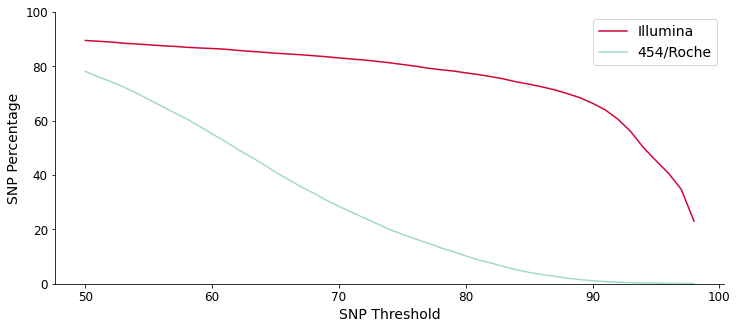

In [7]:


def switcher(base):
    return {
        'A': 0,
        'C': 1,
        'G': 2,
        'T': 3
    }.get(base, -1)

def adjust_according_to_cigar(cigar, read):
    adjusted_read = ''
    if 'I' in cigar or 'D' in cigar or 'S' in cigar:
        cigar_position = 0
        cigar_list = [''.join(g) for _, g in groupby(cigar, str.isalpha)]

        # delete insertions and add - for deletion
        for index in range(0, len(cigar_list), 2):
            if cigar_list[index + 1] == 'S':
                if int(cigar_list[index]) > 10:
                    return ''
            if cigar_list[index + 1] == 'D':
                adjusted_read += '-' * int(cigar_list[index])
            elif cigar_list[index + 1] != 'I':
                adjusted_read += read[cigar_position:(cigar_position + int(cigar_list[index]))]
                cigar_position += int(cigar_list[index])
    else:
        adjusted_read = read
    return adjusted_read

ratio_per_NGS = []
for data_name in ['454', 'Illumina']:
    print(data_name)
    if not exists('../data/'+ data_name + '_SNP_pos.npy'):
        sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
        number_of_reads = len(sam_file.readlines())
        base_count = np.zeros((9721, 4))
        sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
        line = sam_file.readline()
        counter = 1
        while line:
            read = line.split('\t')[9]
            cigar = line.split('\t')[5]
            adjusted_read = adjust_according_to_cigar(cigar, read)
            if len(adjusted_read) == 0:
                line = sam_file.readline()
                continue
            pos = int(line.split('\t')[3])
            for index, base in enumerate(adjusted_read):
                base_count[pos + index][switcher(base)] += 1 # base_count[pos + index][switcher(base)] + 1

            line = sam_file.readline()
            counter +=1
            if counter%25000 == 0:
                print(counter)

        # TODO save numpy file
        np.save('../data/'+ data_name + '_SNP_pos', base_count)
    else:
        base_count = np.load('../data/'+ data_name + '_SNP_pos.npy')
        print('loaded')

    SNPs = []
    ratio=[]
    number_of_SNPs = []
    number_of_no_SNPs = []
    print(len(base_count))
    thresholds = range(50,99)
    for threshold in thresholds:
        for index in range(base_count.shape[0]):
            if np.sum(base_count[index]) > 1000:
                if np.max(base_count[index])/np.sum(base_count[index]) > threshold/100:
                    # print(np.max(base_count[index])/np.sum(base_count[index]))
                    SNPs.append(index)

        # print('threshold: ' +  str(threshold)+'%' )
        # print('SNPs:', len(SNPs))
        # print('SNPs/len(haplotype) * 100:', len(SNPs)/9721* 100)
        number_of_SNPs.append(len(SNPs))
        ratio.append(len(SNPs)/9721 * 100)
        SNPs = []
    ratio_per_NGS.append(ratio)
print(ratio_per_NGS)
plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))
ratio_454 = ratio_per_NGS[0]
ratio_illumina = ratio_per_NGS[1]

ax.plot(thresholds,ratio_illumina, '-', color="#D20537", label ='Illumina')
ax.plot(thresholds,ratio_454, '-', color="#A5D7D2", label ='454/Roche')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
#
print(number_of_SNPs)
plt.ylim([0,100])
plt.rcParams.update({'font.size': 12})
plt.xlabel('SNP Threshold',fontsize=14)
plt.ylabel('SNP Percentage',fontsize=14)
plt.show()

454
loaded
9721


<ipython-input-8-0b69792aa918>:72: RuntimeWarning: divide by zero encountered in log2
  sum -= p * np.log2(p)
<ipython-input-8-0b69792aa918>:72: RuntimeWarning: invalid value encountered in double_scalars
  sum -= p * np.log2(p)


Illumina
loaded
9721
[]


<Figure size 864x360 with 0 Axes>

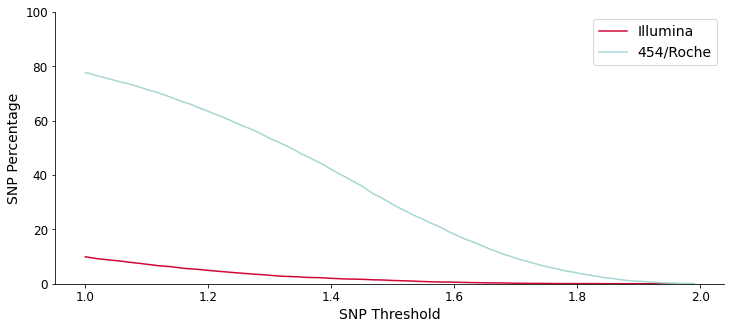

In [8]:


def switcher(base):
    return {
        'A': 0,
        'C': 1,
        'G': 2,
        'T': 3
    }.get(base, -1)


ratio_per_NGS = []
for data_name in ['454', 'Illumina']:
    print(data_name)
    if not exists('../data/'+ data_name + '_SNP_pos.npy'):
        sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
        number_of_reads = len(sam_file.readlines())
        base_count = np.zeros((9721, 4))
        sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
        line = sam_file.readline()

        counter = 1
        while line:
             # NEW
            read = line.split('\t')[9]
            cigar = line.split('\t')[5]
            adjusted_read = ''
            if 'I' in cigar or 'D' in cigar or 'S' in cigar:
                cigar_position = 0
                cigar_list = [''.join(g) for _, g in groupby(cigar, str.isalpha)]
                # delete insertions and add '-' for deletion
                for index in range(0, len(cigar_list), 2):
                    if cigar_list[index + 1] == 'S':
                        if int(cigar_list[index]) > 3:
                            continue
                    elif cigar_list[index + 1] == 'D':
                        adjusted_read += '-' * int(cigar_list[index])
                    elif cigar_list[index + 1] == 'I':
                        cigar_position += int(cigar_list[index])
                    elif cigar_list[index + 1] == 'M':
                        adjusted_read += read[cigar_position:(cigar_position + int(cigar_list[index]))]
                        cigar_position += int(cigar_list[index])
            else:
                adjusted_read = read
            pos = int(line.split('\t')[3])
            for index, base in enumerate(adjusted_read):
                base_count[pos + index][switcher(base)] += 1 # base_count[pos + index][switcher(base)] + 1

            line = sam_file.readline()
            counter +=1
            if counter%25000 == 0:
                print(counter)

        # TODO save numpy file
        np.save('../data/'+ data_name + '_SNP_pos', base_count)
    else:
        base_count = np.load('../data/'+ data_name + '_SNP_pos.npy')
        print('loaded')

    # print(base_count)
    result = []
    SNPs = []
    ratio=[]
    number_of_SNPs = []
    number_of_no_SNPs = []
    print(len(base_count))
    thresholds = [x/100 for x in range(100, 200)]
    for threshold in thresholds:
        for index in range(base_count.shape[0]):
            if np.sum(base_count[index]) > 1000:
                sum = 0
                for i in range(4):
                    p = (base_count[index][i])/np.sum(base_count[index])
                    sum -= p * np.log2(p)
                if sum > threshold:
                    # print(sum, base_count[index])
                    SNPs.append(index)
                # if(sum > -0.1):
                #     print('-0.1',base_count[index])
                # if(p * np.log2(p) < -0.5):
                #     print(p * np.log2(p))
                #     print('-0.5',base_count[index])
                # if np.max(base_count[index])/np.sum(base_count[index]) > threshold/100:
                #     # print(np.max(base_count[index])/np.sum(base_count[index]))
                #     SNPs.append(index)

        # print('threshold: ' +  str(threshold)+'%' )
        # print('SNPs:', len(SNPs))
        # print('SNPs/len(haplotype) * 100:', len(SNPs)/9721* 100)
#         number_of_SNPs.append(len(SNPs))
#         print(threshold,len(SNPs))
        ratio.append(len(SNPs)/9721 * 100)
        SNPs = []
#         no_SNPs = []
    ratio_per_NGS.append(ratio)
# print(ratio_per_NGS)
plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))
ratio_454 = ratio_per_NGS[0]
ratio_illumina = ratio_per_NGS[1]

ax.plot(thresholds,ratio_illumina, '-', color="#D20537", label ='Illumina')
ax.plot(thresholds,ratio_454, '-', color="#A5D7D2", label ='454/Roche')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
#
print(number_of_SNPs)
plt.ylim([0,100])
plt.rcParams.update({'font.size': 12})
plt.xlabel('SNP Threshold',fontsize=14)
plt.ylabel('SNP Percentage',fontsize=14)
plt.show()

In [9]:
thresholds = [x/100 for x in range(190,200)]
print(thresholds)

[1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99]


454
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0

<Figure size 864x360 with 0 Axes>

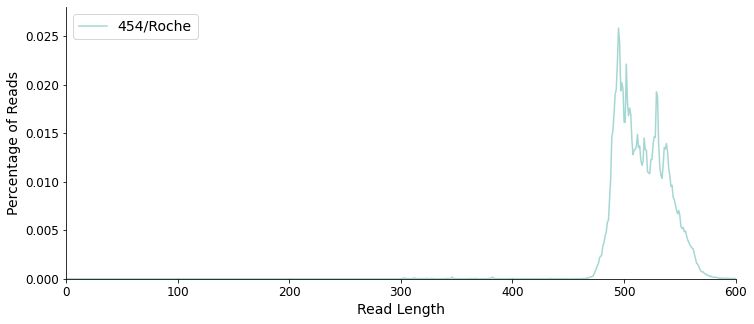

<Figure size 864x360 with 0 Axes>

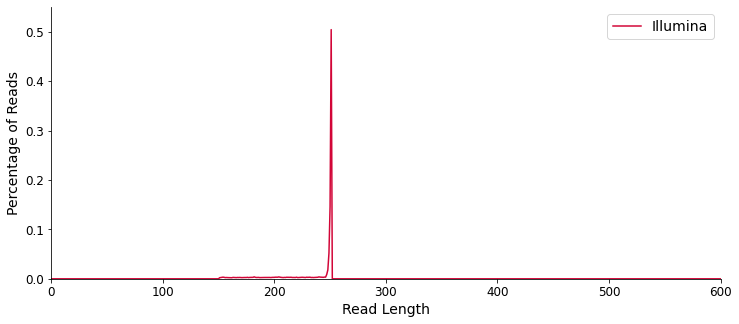

In [10]:
# read length of illumina and 454 mapped
final = []
for data_name in ['454', 'Illumina']:
    print(data_name)
    sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
    number_of_reads = len(sam_file.readlines())
    sam_file = open('../data/'+ data_name + '_mapped.sam', 'r')
    line = sam_file.readline()
    counter = np.zeros(1000)
    while line:
        length = len(line.split('\t')[9])
        counter[length] += 1
        line = sam_file.readline()
    print(counter)
    final.append(counter/number_of_reads)

plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))
read_length_454 = final[0]

ax.plot(range(1000),read_length_454, '-', color="#A5D7D2", label ='454/Roche')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
#
plt.xlim([0,600])
plt.ylim([0,0.028])
plt.rcParams.update({'font.size': 12})
plt.ylabel('Percentage of Reads',fontsize=14)
plt.xlabel('Read Length',fontsize=14)
plt.show()
plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))
read_length_illumina = final[1]

ax.plot(range(1000),read_length_illumina, '-', color="#D20537", label ='Illumina')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
#
plt.xlim([0,600])
plt.ylim([0,0.55])
plt.rcParams.update({'font.size': 12})
plt.ylabel('Percentage of Reads',fontsize=14)
plt.xlabel('Read Length',fontsize=14)
plt.show()


In [11]:
# probability of an insertions:
ref_aligned_file = open('../data/reference/aligned_REF.fasta', 'r')
ref_lines = ref_aligned_file.readlines()

snp_positions_file =  open('../data/reference/snp_positions.txt', 'r')
snp_positions = snp_positions_file.readlines()
snp_positions = [int(s.strip('\n')) for s in snp_positions]
haplotypes = [[] for i in range(5)]
for index, line in enumerate(ref_lines):
    if line[0] != '>':
        haplotypes[int(index/2)] = ([line[i] for i in snp_positions])

count_insertions = sum(np.where(np.array(haplotypes) == '-')[0])

print('probability that SNP is an insertion',  count_insertions/(len(haplotypes) * len(haplotypes[0])))


TypeError: 'numpy.float64' object is not callable

In [ ]:
clusters = [2,3,4,5,6,7,8]
read_length_2 = 40
read_length_3 = 60
read_length_4 = 74
read_length_5 = 100
read_length_6 = 116
read_length_7 = 144
read_length_8 = 164
number_of_reads_2 = [40, 73, 202, 369, 757, 3755, 7644]
number_of_reads_3 = [56, 115, 288, 557, 1124, 5639, 11330]
number_of_reads_4 = [79, 151, 382, 692, 1403, 6782, 13930]
number_of_reads_5 = [96, 187, 475, 923, 1854, 9156, 18837]
number_of_reads_6 = [110, 221, 543, 1070, 2179, 10521, 22005]
number_of_reads_7 = [135, 243, 657, 1300, 2679, 12783, 26846]
number_of_reads_8 = [156, 300, 725, 1476, 2960, 14269, 30292]

n2 = np.array([i/read_length_2 for i in number_of_reads_2])
n3 = np.array([i/read_length_3 for i in number_of_reads_3])
n4 = np.array([i/read_length_4 for i in number_of_reads_4])
n5 = np.array([i/read_length_5 for i in number_of_reads_5])
n6 = np.array([i/read_length_6 for i in number_of_reads_6])
n7 = np.array([i/read_length_7 for i in number_of_reads_7])
n8 = np.array([i/read_length_8 for i in number_of_reads_8])
average_read_length = np.mean([n2, n3, n4, n5, n6, n7], axis=0)
print(average_read_length)
plt.figure(figsize=(12,5))

fig, ax = plt.subplots(figsize=(12,5))
ratio_454 = ratio_per_NGS[0]
ratio_illumina = ratio_per_NGS[1]

ax.plot(clusters,average_read_length, '-o', color="#A5D7D2")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(fontsize=14)
#
print(number_of_SNPs)
# plt.ylim([0,100])
plt.rcParams.update({'font.size': 12})
plt.xlabel('Number of Clusters',fontsize=14)
plt.ylabel('Normalized Average Read Length',fontsize=14)
plt.show()